# Systems Immunogenetics Project

## Expression Array QA/QC Workflow

### McWeeney Lab, Oregon Health & Science University

#### Authors: Gabrielle Choonoo (choonoo@ohsu.edu) and Michael Mooney (mooneymi@ohsu.edu)

## Introduction

This document will walk through the steps for the initial processing of expression array data, including the creation of plots for QA/QC.

Required Files:
- This notebook (`SIG_Array_QA_QC_Workflow.ipynb`): [[Download here]](https://raw.githubusercontent.com/mooneymi/systems_immunogenetics/master/SIG_Array_QA_QC_Workflow.ipynb)
- The R script (`array_qa_qc_functions.r`): [[Download here]](https://raw.githubusercontent.com/mooneymi/systems_immunogenetics/master/array_qa_qc_functions.r)

Required R packages:
- `gdata`: [https://cran.r-project.org/web/packages/gdata/index.html](https://cran.r-project.org/web/packages/gdata/index.html)
- `oligo`: [http://www.bioconductor.org/packages/release/bioc/html/oligo.html](http://www.bioconductor.org/packages/release/bioc/html/oligo.html)
- `pd.mogene.2.1.st`: [http://www.bioconductor.org/packages/release/data/annotation/html/pd.mogene.2.1.st.html](http://www.bioconductor.org/packages/release/data/annotation/html/pd.mogene.2.1.st.html)
- `mogene21sttranscriptcluster.db`: [http://www.bioconductor.org/packages/release/data/annotation/html/mogene21sttranscriptcluster.db.html](http://www.bioconductor.org/packages/release/data/annotation/html/mogene21sttranscriptcluster.db.html)
- `Heatplus`: [http://www.bioconductor.org/packages/release/bioc/html/Heatplus.html](http://www.bioconductor.org/packages/release/bioc/html/Heatplus.html)
- `ggplot2`: [https://cran.r-project.org/web/packages/ggplot2/index.html](https://cran.r-project.org/web/packages/ggplot2/index.html)
- `reshape2`: [https://cran.r-project.org/web/packages/reshape2/index.html](https://cran.r-project.org/web/packages/reshape2/index.html)

** Note: this notebook can also be downloaded as an R script (only the code blocks seen below will be included): [[Download R script here]](https://raw.githubusercontent.com/mooneymi/systems_immunogenetics/master/SIG_Array_QA_QC_Workflow.r)

**All code is available on GitHub: [https://github.com/mooneymi/systems_immunogenetics](https://github.com/mooneymi/systems_immunogenetics)** 

If you are not familiar with Jupyter Notebooks, I've created a short tutorial to get you up and running quickly. There is also plenty of documentation online:

1. [Jupyter for R Tutorial](http://nbviewer.jupyter.org/github/mooneymi/jupyter_notebooks/blob/master/r/Getting_Started_R.ipynb)
2. [Jupyter Documentation](http://jupyter.org/)
3. [Conda and R](https://www.continuum.io/conda-for-r)

## Step 1. Load Necessary R Functions and Libraries

In [15]:
## Load libraries and functions for array processing and QA/QC plots
source('array_qa_qc_functions.r')

## Step 2. Load Sample Annotations

In [2]:
## Read the annotation spreadsheet into R
annot_dir = '/Users/mooneymi/Documents/MyDocuments/SystemsImmunogenetics/Expression/Bat_Virus_Array'
setwd(annot_dir)
sample_annot = read.xls('BatPlate_Annotation_editedMM.xlsx', header=T, as.is=T, na.strings=c(""," ", "NA", "#DIV/0!"))
rownames(sample_annot) = sample_annot$ID

In [3]:
## Check annotation dataframe
head(sample_annot[,1:5])

,ID,Mating,Number,RIN,Dam
13067x16912_f67bat,13067x16912_f67bat,13067x16912,67,9.1,13067
13067x16912_f68bat,13067x16912_f68bat,13067x16912,68,8.8,13067
13067x16912_f69bat,13067x16912_f69bat,13067x16912,69,1.6,13067
13140x16680_f84bat,13140x16680_f84bat,13140x16680,84,8.7,13140
13140x16680_f86bat,13140x16680_f86bat,13140x16680,86,9.3,13140
13140x16680_f95bat,13140x16680_f95bat,13140x16680,95,9,13140


## Step 3. Load Raw Expression Data

In [4]:
## Set directory where .CEL files are located, and get the list of files
## You will have to change the directory path
cel_dir = '/Users/mooneymi/Documents/MyDocuments/SystemsImmunogenetics/Expression/Bat_Virus_Array/data'
cel_files = list.celfiles(cel_dir)
## Check file names
cel_files[1:3]

[1] "13067x16912_f67bat_2.CEL" "13067x16912_f68bat_2.CEL"
[3] "13067x16912_f69bat_2.CEL"

In [5]:
## Create sample names (these must match the annotation file)
sample_names = gsub("_2.CEL", "", cel_files)
## Check sample names
sample_names[1:5]

[1] "13067x16912_f67bat" "13067x16912_f68bat" "13067x16912_f69bat"
[4] "13140x16680_f84bat" "13140x16680_f86bat"

In [6]:
## Subset sample annotation dataframe
sample_annot = sample_annot[sample_names,]
length(sample_names) == dim(sample_annot)[1]

[1] TRUE

In [7]:
## Create a phenoData object
phenoData = new("AnnotatedDataFrame", data=sample_annot)
phenoData

An object of class 'AnnotatedDataFrame'
  rowNames: 13067x16912_f67bat 13067x16912_f68bat ... MAQC (96 total)
  varLabels: ID Mating ... OnArray (28 total)
  varMetadata: labelDescription

In [8]:
## Load the raw expression data
raw.exprs = read.celfiles(file.path(cel_dir, cel_files), pkgname="pd.mogene.2.1.st", 
                          sampleNames=sample_names, phenoData=phenoData)

Platform design info loaded.


Reading in : /Users/mooneymi/Documents/MyDocuments/SystemsImmunogenetics/Expression/Bat_Virus_Array/data/13067x16912_f67bat_2.CEL
Reading in : /Users/mooneymi/Documents/MyDocuments/SystemsImmunogenetics/Expression/Bat_Virus_Array/data/13067x16912_f68bat_2.CEL
Reading in : /Users/mooneymi/Documents/MyDocuments/SystemsImmunogenetics/Expression/Bat_Virus_Array/data/13067x16912_f69bat_2.CEL
Reading in : /Users/mooneymi/Documents/MyDocuments/SystemsImmunogenetics/Expression/Bat_Virus_Array/data/13140x16680_f84bat_2.CEL
Reading in : /Users/mooneymi/Documents/MyDocuments/SystemsImmunogenetics/Expression/Bat_Virus_Array/data/13140x16680_f86bat_2.CEL
Reading in : /Users/mooneymi/Documents/MyDocuments/SystemsImmunogenetics/Expression/Bat_Virus_Array/data/13140x16680_f95bat_2.CEL
Reading in : /Users/mooneymi/Documents/MyDocuments/SystemsImmunogenetics/Expression/Bat_Virus_Array/data/16188x3252_f281bat_2.CEL
Reading in : /Users/mooneymi/Documents/MyDocuments/SystemsImmunogenetics/Expression/Bat_Vi

Warning message:
In read.celfiles(file.path(cel_dir, cel_files), pkgname = "pd.mogene.2.1.st", : 'channel' automatically added to varMetadata in phenoData.

In [9]:
head(pData(phenoData)[,1:5])

,ID,Mating,Number,RIN,Dam
13067x16912_f67bat,13067x16912_f67bat,13067x16912,67,9.1,13067
13067x16912_f68bat,13067x16912_f68bat,13067x16912,68,8.8,13067
13067x16912_f69bat,13067x16912_f69bat,13067x16912,69,1.6,13067
13140x16680_f84bat,13140x16680_f84bat,13140x16680,84,8.7,13140
13140x16680_f86bat,13140x16680_f86bat,13140x16680,86,9.3,13140
13140x16680_f95bat,13140x16680_f95bat,13140x16680,95,9,13140


In [11]:
## Save raw expression to file in same directory as .CEL files
## This may be used as input for DE and Pathway analysis
save(raw.exprs, file=file.path(cel_dir, 'bat_virus_raw_exprs_2-FEB-2016.rda'))

## Step 4. Summarize and Normalize Expression Data

In [12]:
## Create un-normalized ExpressionSet
bgcor.exprs = rma(raw.exprs, normalize=FALSE, target="core")

Background correcting
Calculating Expression


In [13]:
## Create normalized ExpressionSet
norm.exprs = rma(raw.exprs, normalize=TRUE, target="core")

Background correcting
Normalizing
Calculating Expression


In [14]:
## Check normalized expression matrix
exprs(norm.exprs)[1:5,1:5]

,13067x16912_f67bat,13067x16912_f68bat,13067x16912_f69bat,13140x16680_f84bat,13140x16680_f86bat
17200001,5.195653,5.984647,4.490499,6.040004,6.567711
17200003,5.475113,5.261995,4.716498,5.583019,5.503679
17200005,4.240997,4.450219,6.114470,4.240607,4.375452
17200007,5.104637,4.446430,5.243653,4.569253,5.240228
17200009,5.577562,5.216354,6.269951,6.487609,5.293501


In [ ]:
## Save normalized expression to file (optional)
#save(norm.exprs, file="bat_virus_array_normalized.rda")

## Step 5. Create Boxplots

In [15]:
describe(make.boxplot)


This function creates a boxplot of the raw or normalized expression values. If RIN values 
are available a subplot will be added.

Parameters:
use.exprs: An ExpressionSet returned by the rma() function.
type: The type of plot to create, either 'raw' or 'norm'. 
make.pdf: A logical indicating if a PDF should be created. 
base.name: The base filename of the PDF to create (default is 'test') 
order.by: A character vector containing the column names that will be used to order 
   the samples (default is c('Mating', 'Sex', 'Number')).
color.by: The column name used to assign colors to the samples (default is 'Mating'). 
highlight.names: A character vector containing sample names (default=NULL). Can be used 
   to highlight samples in the plot. 
...: Additional parameters can be passed to format the x-axis labels.



Warning message:
In make.boxplot(bgcor.exprs, type = "raw", order.by = c("Mating", : NAs introduced by coercion

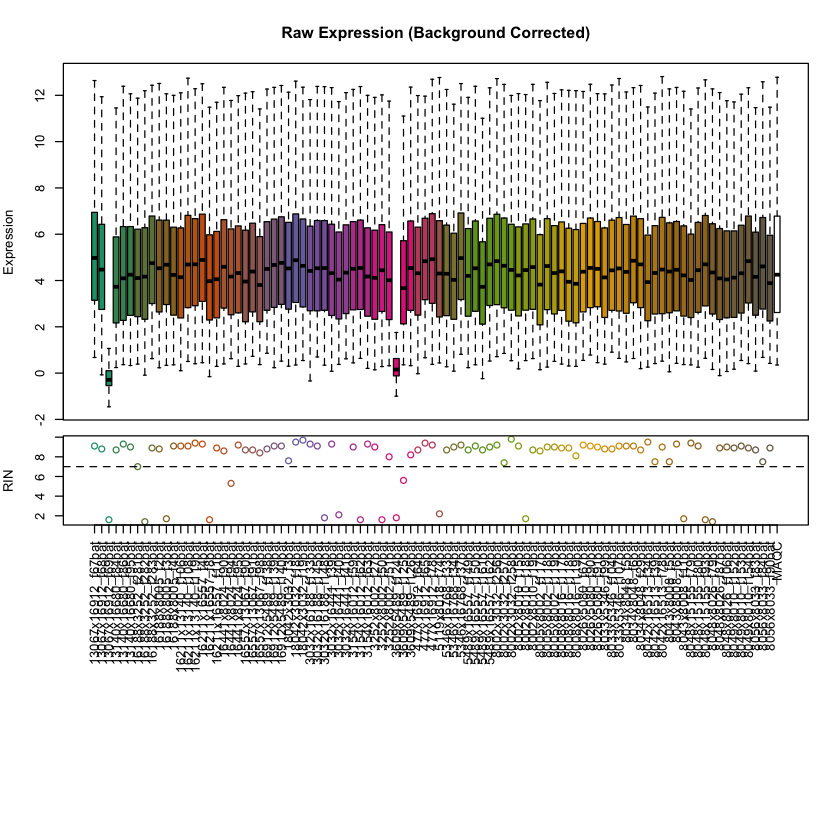

In [16]:
## Boxplot of un-normalized expression values
make.boxplot(bgcor.exprs, type = 'raw', order.by=c("Mating", "Number"), color.by="Mating", make.pdf=F)

Warning message:
In make.boxplot(norm.exprs, type = "norm", order.by = c("Mating", : NAs introduced by coercion

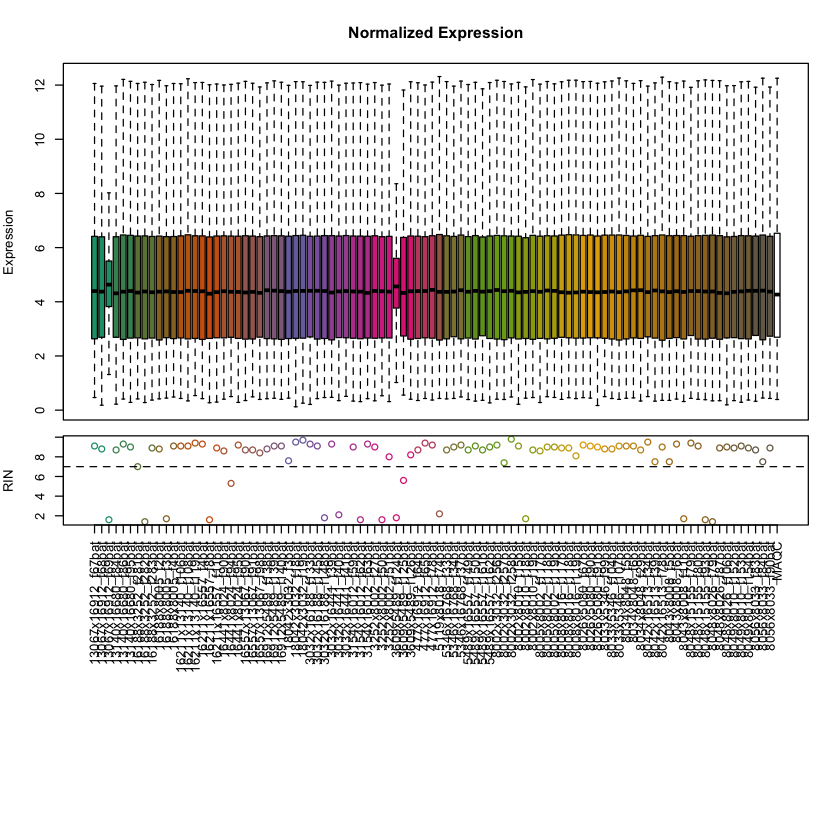

In [17]:
## Boxplot of normalized expression values
make.boxplot(norm.exprs, type = 'norm', order.by=c("Mating", "Number"), color.by="Mating", make.pdf=F)

## Step 6. Create Bacterial Spike Plot

In [18]:
describe(plot.bac.spikes)


This function creates a bacterial spike plot.

Parameters:
use.exprs: An ExpressionSet returned by the rma() function.
pgf.file: A probe group file for the array.
make.pdf: A logical indicating if a PDF should be created. 
base.name: The base filename of the PDF to create (default is 'test').



In [19]:
## The probe group file from Affy for the array
pg_file = '/Users/mooneymi/Documents/MyDocuments/SystemsImmunogenetics/Expression/MoGene-2_1-st.pgf'

Loading required package: affxparser


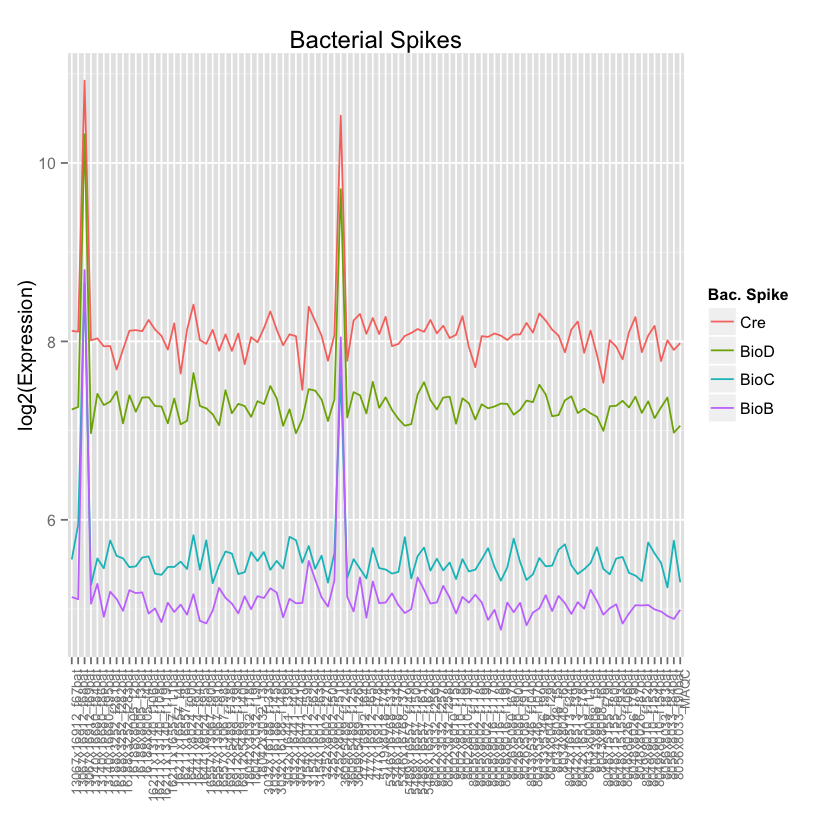

In [20]:
## Create bacterial spike plot
plot.bac.spikes(norm.exprs, pg_file, make.pdf=F)

## Step 7. Create PolyA Spike Plot

In [21]:
describe(plot.polya.spikes)


This function creates a polyA spike plot.

Parameters:
use.exprs: An ExpressionSet returned by the rma() function.
pgf.file: A probe group file for the array.
plot.type: A string indicating the type of control probesets for the array (default is 'AFFX-r2-Bs').
make.pdf: A logical indicating if a PDF should be created. 
base.name: The base filename of the PDF to create (default is 'test').



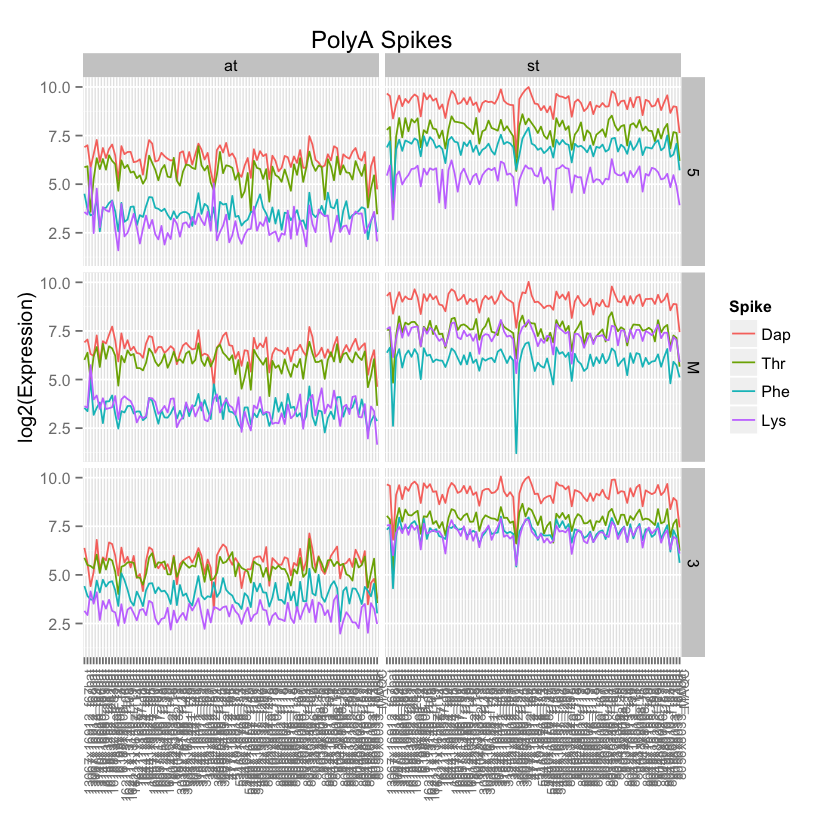

In [22]:
## Create polyA spike plot
plot.polya.spikes(norm.exprs, pg_file, make.pdf=F)

## Step 7. Create Annotated Heatmaps

In [23]:
describe(make.heatmap)


This function creates an annotated heatmap for expression data.

Parameters:
use.exprs: An ExpressionSet returned by the rma() function.
cut.dist: The height at which to cut the dendrogram (default is NULL; no cutting).
num.genes: A number indicating the number of most variable genes to include. If NULL, all genes
   will be included (default is 1000).
base.factors: A character vector containing column names that will be used to annotate the
   heatmap (default is c('Sex')).
rin.breaks: A numeric vector indicating the break points for discretizing the RIN 
   scores (default is c(0, 5, 7, 10)).
make.pdf: A logical indicating if a PDF should be created. 
base.name: The base filename of the PDF to create (default is 'test').



Warning message:
In make.heatmap(norm.exprs[, norm.exprs$ID != "MAQC"], base.factors = c("Sex", : NAs introduced by coercion

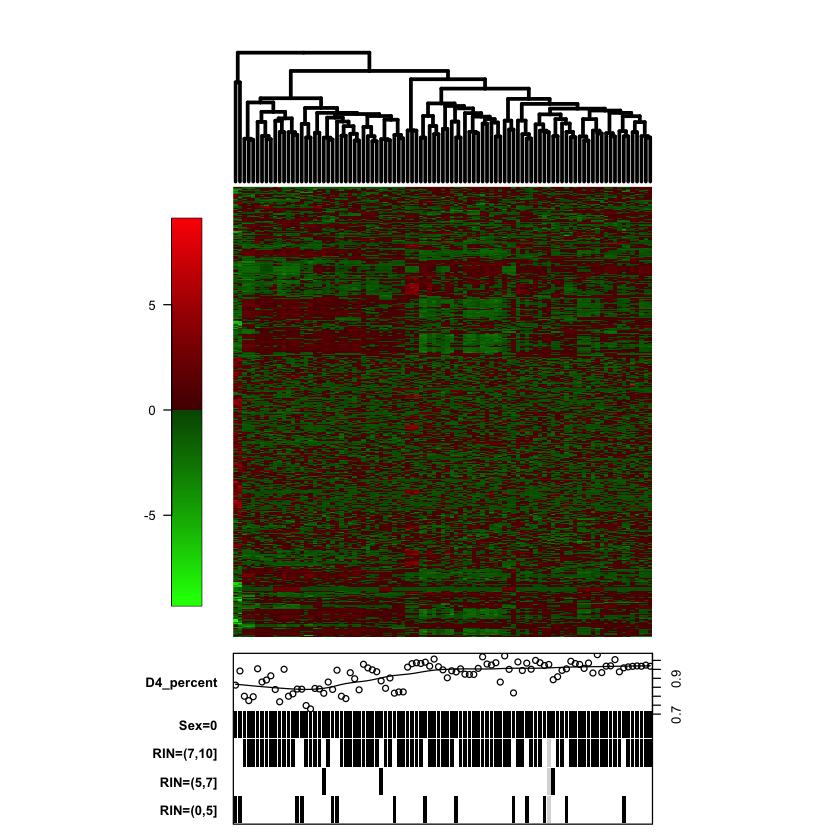

In [24]:
## Create annotated heatmap (don't include MAQC in heatmap)
make.heatmap(norm.exprs[, norm.exprs$ID != 'MAQC'], base.factors=c('Sex', 'D4_percent'), make.pdf=F)

## Step 8. Plot MAQC Over Time

In [22]:
## Load MAQC Annotations
maqc_annot_dir = '/Users/mooneymi/Documents/MyDocuments/SystemsImmunogenetics/Expression/MAQC'
maqc_annot = read.xls(file.path(maqc_annot_dir, 'maqc_annotation.xlsx'), header=T, as.is=T, na.strings=c(""," ", "NA", "#DIV/0!"))
rownames(maqc_annot) = maqc_annot$ID

In [23]:
## Set directory where MAQC .CEL files are located, and get the list of files
## You will have to change the directory path
maqc_cel_dir = '/Users/mooneymi/Documents/MyDocuments/SystemsImmunogenetics/Expression/MAQC'
maqc_cel_files = list.celfiles(maqc_cel_dir)
## Check file names
maqc_cel_files[1:3]

[1] "Ferris_BAT_MAQC_1_4_16.CEL"  "Ferris_FLU_MAQC_6_25_15.CEL"
[3] "Gale_WNV_MAQC_11_7_14.CEL"

In [24]:
## Create sample names (these must match the annotation file)
maqc_names = gsub(".CEL", "", maqc_cel_files)

In [25]:
## Create a phenoData object
maqcData = new("AnnotatedDataFrame", data=maqc_annot)
maqcData

An object of class 'AnnotatedDataFrame'
  rowNames: Ferris_BAT_MAQC_1_4_16 Ferris_FLU_MAQC_6_25_14 ...
    Lund_WNV_MAQC_1_2_15 (5 total)
  varLabels: ID Type ... Date.Downloaded (5 total)
  varMetadata: labelDescription

In [26]:
## Load the MAQC raw expression data
maqc.raw.exprs = read.celfiles(file.path(maqc_cel_dir, maqc_cel_files), pkgname="pd.mogene.2.1.st", 
                          sampleNames=maqc_names, phenoData=maqcData)

Platform design info loaded.


Reading in : /Users/mooneymi/Documents/MyDocuments/SystemsImmunogenetics/Expression/MAQC/Ferris_BAT_MAQC_1_4_16.CEL
Reading in : /Users/mooneymi/Documents/MyDocuments/SystemsImmunogenetics/Expression/MAQC/Ferris_FLU_MAQC_6_25_15.CEL
Reading in : /Users/mooneymi/Documents/MyDocuments/SystemsImmunogenetics/Expression/MAQC/Gale_WNV_MAQC_11_7_14.CEL
Reading in : /Users/mooneymi/Documents/MyDocuments/SystemsImmunogenetics/Expression/MAQC/Gale_WNV_MAQC_9_17_15.CEL
Reading in : /Users/mooneymi/Documents/MyDocuments/SystemsImmunogenetics/Expression/MAQC/Lund_WNV_MAQC_1_2_15.CEL


Warning message:
In read.celfiles(file.path(maqc_cel_dir, maqc_cel_files), pkgname = "pd.mogene.2.1.st", : 'channel' automatically added to varMetadata in phenoData.

In [27]:
## Create un-normalized MAQC ExpressionSet
maqc.bgcor.exprs = rma(maqc.raw.exprs, normalize=FALSE, target="core")

Background correcting
Calculating Expression


In [9]:
## Create normalized MAQC ExpressionSet
maqc.norm.exprs = rma(maqc.raw.exprs, normalize=TRUE, target="core")

Background correcting
Normalizing
Calculating Expression


Warning message:
In make.boxplot(maqc.bgcor.exprs, type = "raw", order.by = c("Date.Downloaded"), : RIN values were not found in the sample annotations.

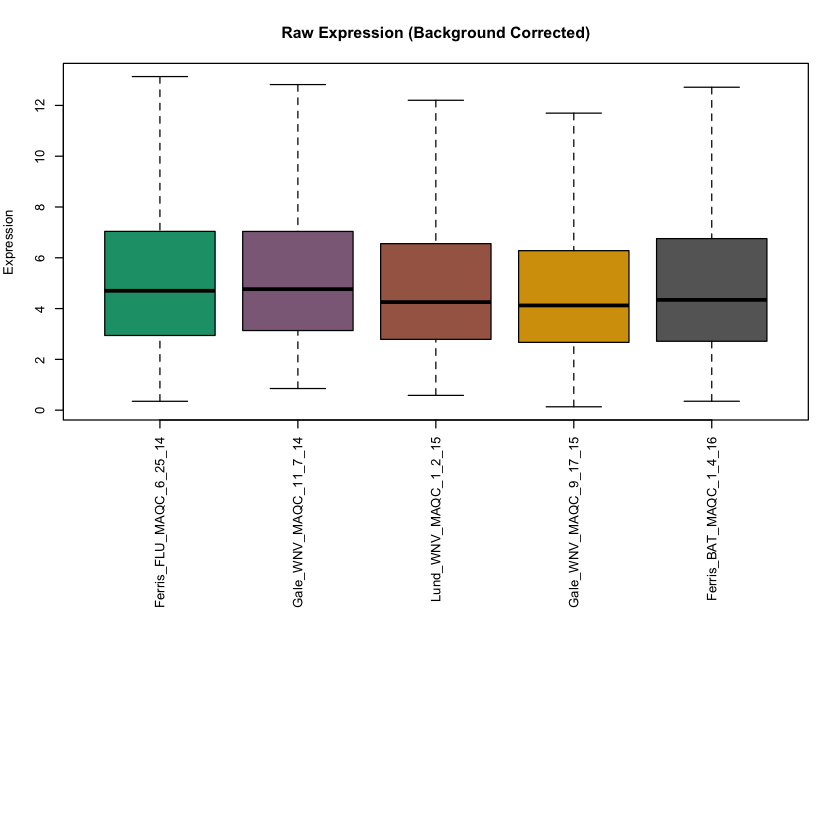

In [28]:
## Create boxplots
make.boxplot(maqc.bgcor.exprs, type = 'raw', order.by=c("Date.Downloaded"), color.by="Date.Downloaded", make.pdf=F)

Warning message:
In make.boxplot(maqc.norm.exprs, type = "norm", order.by = c("Date.Downloaded"), : RIN values were not found in the sample annotations.

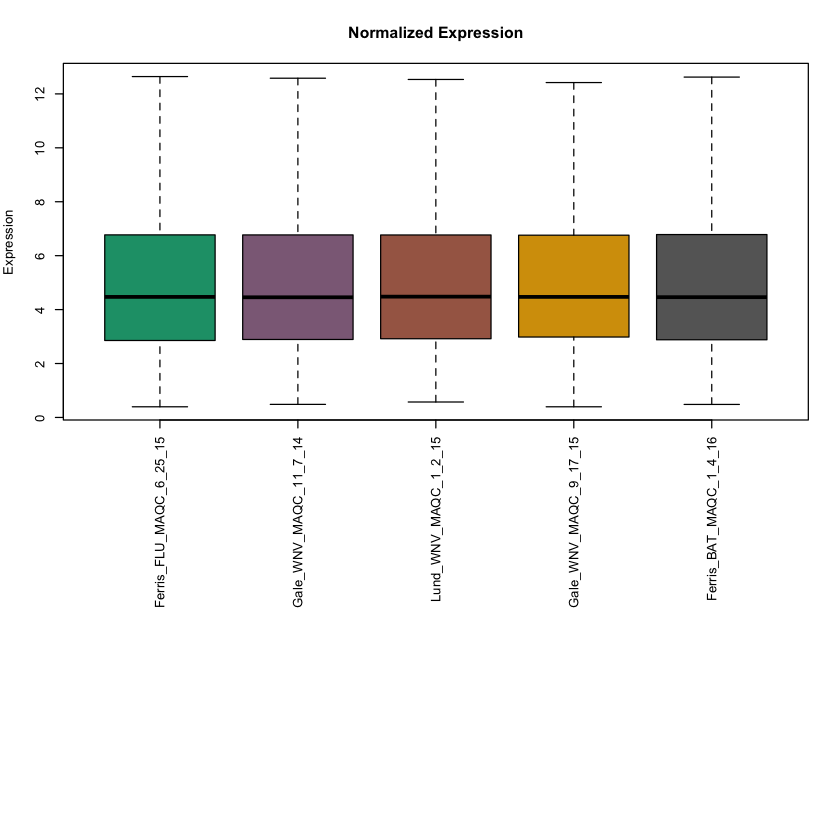

In [29]:
## Create boxplots
make.boxplot(maqc.norm.exprs, type = 'norm', order.by=c("Date.Downloaded"), color.by="Date.Downloaded", make.pdf=F)

#### Last Updated: 24-Feb-2016